One layer Galton Board

In [1]:
import os

In [2]:
os.chdir("..")

In [3]:
print(os.getcwd())

/home/ismail/quantum_python/quantum_nnl_project


In [4]:
from src.galton_box import *

In [5]:
from utils.plot_utils import *

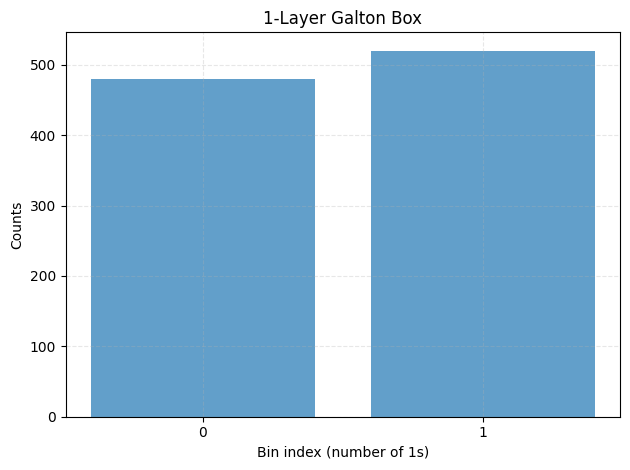

In [6]:
# One layer board
bin_counts = galton_one_layer()
plot_bins(bin_counts, n=1)

Two layer Galton Board

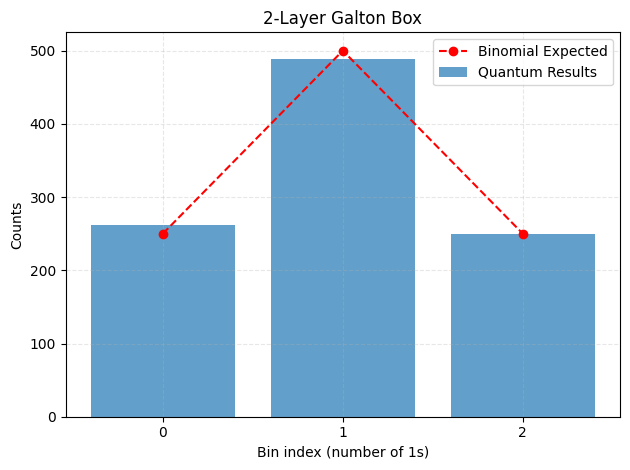

In [7]:
# 2-Layer Galton Board
bin_counts = galton_two_layer()
plot_bins(bin_counts, n=2, overlay='binomial', shots=1000)

N-Layer Galton Board

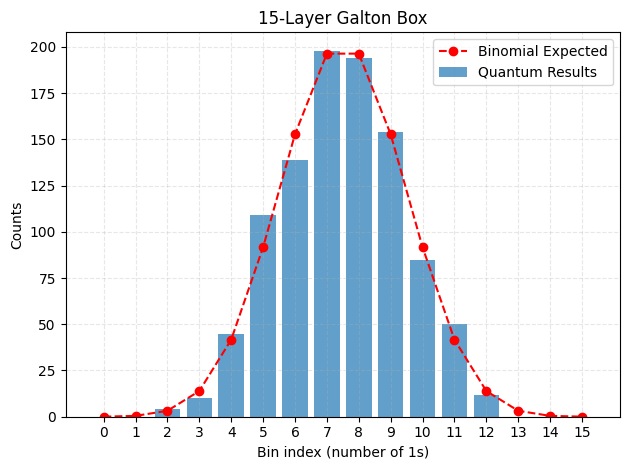

In [8]:
bin_counts = galton_n_layer(15)
plot_bins(bin_counts, n=15, overlay='binomial', shots=1000)

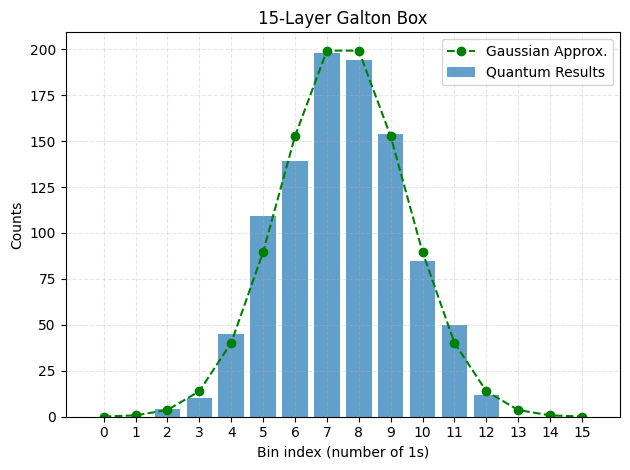

In [9]:
plot_bins(bin_counts, n=15, overlay='gaussian', shots=1000)